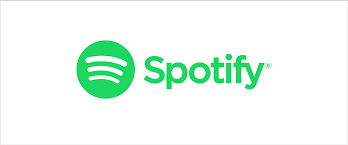

# Importing the libraries:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Having a look: 

In [ ]:
df = pd.read_csv("../input/spotify-dataset-19212020-160k-tracks/data.csv")
df.head(3)

## Indexing and Droping:

### Changing the index with the name and droping the name and id columns.

In [ ]:
df.index = df['name']
df.drop(['id', 'name'], axis =1, inplace = True)
df.head(2)

# SOME TOP 10:

### Top 10 artists by popularity

In [ ]:
plt.figure(figsize=(10, 3))
ax = df.groupby("artists")["popularity"].sum().sort_values(ascending=False).head(10).plot(kind='bar')
ax.set_title("TOP 10 artists")
ax.set_ylabel("POPULARITY")
ax.set_xlabel("ARTIST")
plt.show()

###  Top 5 artist counts in dataset.

In [ ]:
def to_1D(series):
    return pd.Series([x for _list in series for x in _list])

df["artists"] = df["artists"].apply(eval)
temp = to_1D(df['artists'])
temp.value_counts().head(5).plot(kind='bar')

## Dropping the artist column

In [ ]:
df.drop(['artists'], axis =1, inplace = True)
df.head(2)

### Top 10 Songs by popularity

In [ ]:
fig = plt.figure(figsize=(15, 3))
ax = df['popularity'].sort_values(ascending=False).head(10).plot(kind='bar')
ax.set_title('Top 10 Songs')
ax.set_ylabel('POPULARITY')
ax.set_xlabel("NAME")
plt.show()

# MEAN Audio characteristics over year

In [ ]:
plt.figure(figsize=(16, 8))
sns.set(style="whitegrid")
columns = ["acousticness","danceability","energy","speechiness","liveness","valence"]
for col in columns:
    x = df.groupby("year")[col].mean()
    ax= sns.lineplot(x=x.index,y=x,label=col)
ax.set_title('Audio characteristics over year')
ax.set_ylabel('Measure')
ax.set_xlabel('Year')

In [ ]:
plt.figure(figsize=(20, 6))
sns.set(style="whitegrid")
ax = df.groupby("year")['explicit'].sum().plot(kind='bar')
ax.set_title('EXPLICITY over year')
ax.set_ylabel('COUNT')
ax.set_xlabel('Year')

# Splitting the dataset

In [ ]:
train_df = df[df['year']<2000]
test_df = df[df['year']>=2000]

## Ploting train data

In [ ]:
plt.figure(figsize=(16, 8))
sns.set(style="whitegrid")
columns = ["acousticness","danceability","energy","speechiness","liveness","valence"]
for col in columns:
    x = train_df.groupby("year")[col].mean()
    ax= sns.lineplot(x=x.index,y=x,label=col)
ax.set_title('Audio characteristics over year')
ax.set_ylabel('Measure')
ax.set_xlabel('Year')

## Plotting the test data

In [ ]:
plt.figure(figsize=(16, 8))
sns.set(style="whitegrid")
columns = ["acousticness","danceability","energy","speechiness","liveness","valence"]
for col in columns:
    x = test_df.groupby("year")[col].mean()
    ax= sns.lineplot(x=x.index,y=x,label=col)
ax.set_title('Audio characteristics over year')
ax.set_ylabel('Measure')
ax.set_xlabel('Year')

On running ADfuller test on each column only **dancibility**, **liveness**, **valence** got 0.0 **p-values**

In [ ]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(train_df['valence'])
result


In [ ]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(train_df['danceability'])
result


In [ ]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(train_df['liveness'])
result


In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, ax = plt.subplots(2, figsize=(12, 6))
ax[0] = plot_acf(train_df['danceability'], ax=ax[0], lags=100)
ax[1] = plot_pacf(train_df['danceability'], ax=ax[1], lags=100)

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, ax = plt.subplots(2, figsize=(12, 6))
ax[0] = plot_acf(train_df['liveness'], ax=ax[0], lags=100)
ax[1] = plot_pacf(train_df['liveness'], ax=ax[1], lags=100)

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, ax = plt.subplots(2, figsize=(12, 6))
ax[0] = plot_acf(train_df['valence'], ax=ax[0], lags=100)
ax[1] = plot_pacf(train_df['valence'], ax=ax[1], lags=100)

#### THERE IS NO SEASONALITY even upto 100 lags.

# *CONCLUSION*

### The top artists is *The Beatles*.
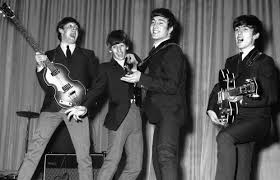
### *Francisco Canaro* is featured in most number of songs.
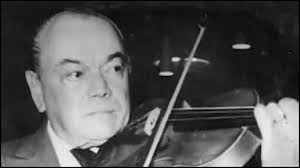
### The top song is *Dakiti* followed by *Mood*(RIP tik tok)

# AUDIO FEATURES:

### *Acousticness* is decreased a lot.
### *Valance* and *Dancibilty* are increased little bit.
### *Energy* increased significantly.
### *Speechiness*, *Liveness* are almost same.

## *EXPLICIT* content is increasing at rapid speed
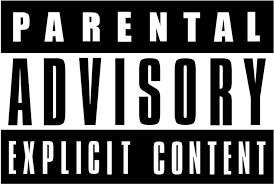

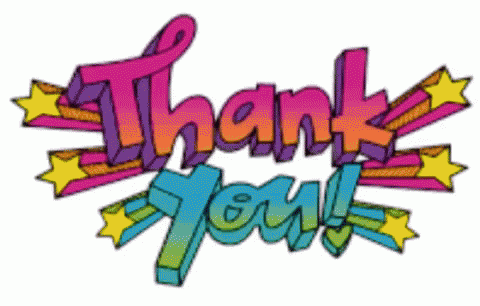

### PEACE 🕊
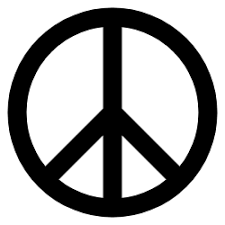